In [3]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Clean data 

In [5]:
#check for null vaules
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# drop cabin
df.drop('Cabin', axis=1, inplace=True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
#drop all the data with missing values

In [9]:
df.dropna(inplace=True)

In [10]:
#Convert sex into numerical form

In [11]:
 df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [12]:
# male = 1, and female = 0

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [14]:
# Decide which varibales to use.

In [15]:
x = df[['Pclass','Sex', 'Age', 'Fare']]

y = df['Survived']

In [16]:
#Train/Dev/Test Split

In [17]:
x_main, x_test, y_main, y_test = train_test_split(x,y, test_size=0.2)

In [18]:
x_train, x_dev, y_train, y_dev = train_test_split(x_main, y_main, test_size=0.2)

In [19]:

dtree = DecisionTreeClassifier(max_depth=None)
dtree = dtree.fit(x_train, y_train)
dev_score = dtree.score(x_dev, y_dev)

In [20]:
features = list(x.columns[0:])
features

['Pclass', 'Sex', 'Age', 'Fare']

## Decision Tree without Pruning

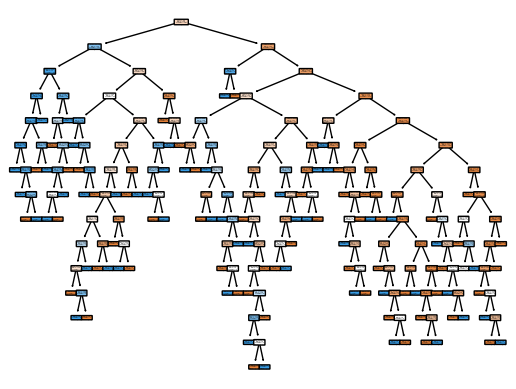

In [21]:
#Decision Tree with 
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(dtree, out_file='dtree.dot', feature_names = features,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(dtree,feature_names = features, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('dtree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz

In [22]:
print(f"Performance without pruning:", {dev_score})

Performance without pruning: {0.7368421052631579}


In [23]:
depth = range(2, 11, 1)

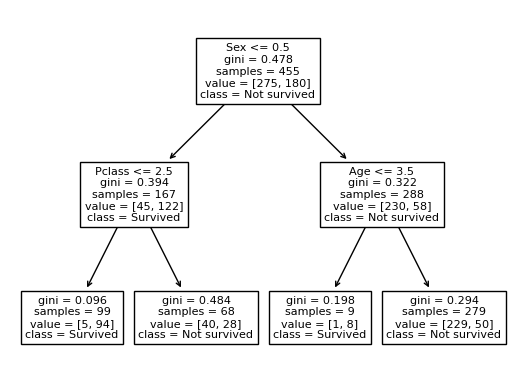

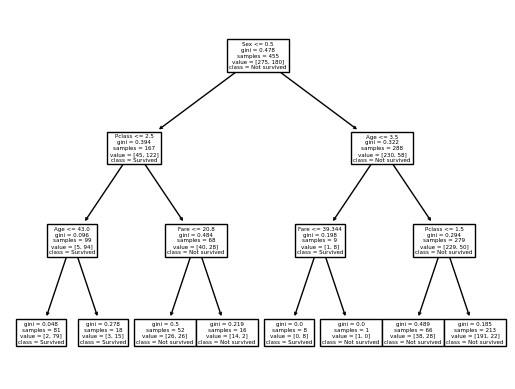

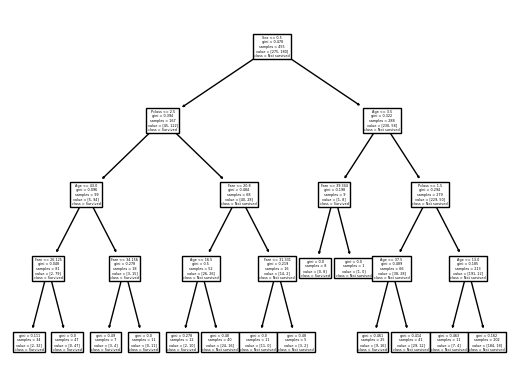

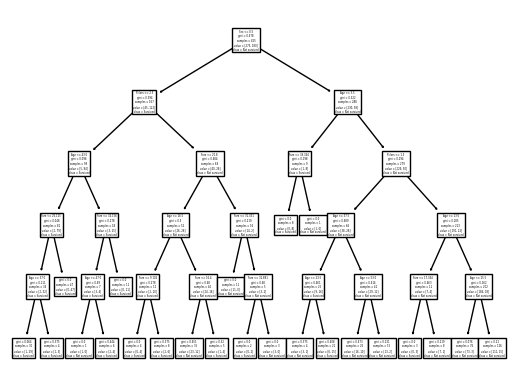

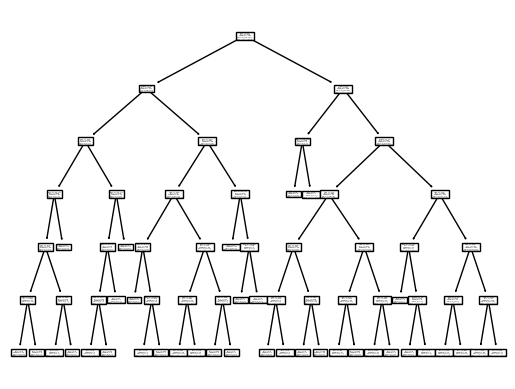

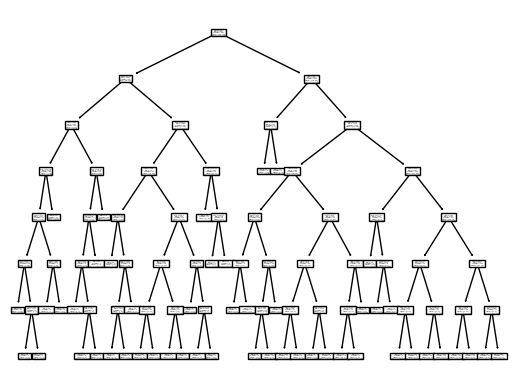

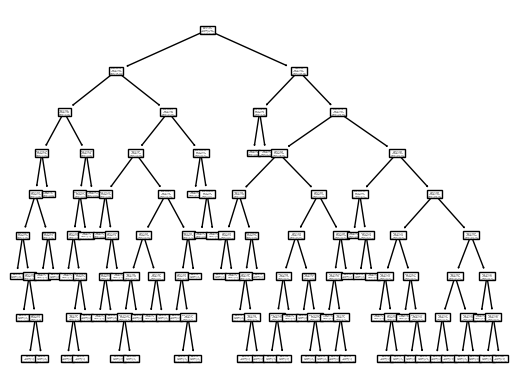

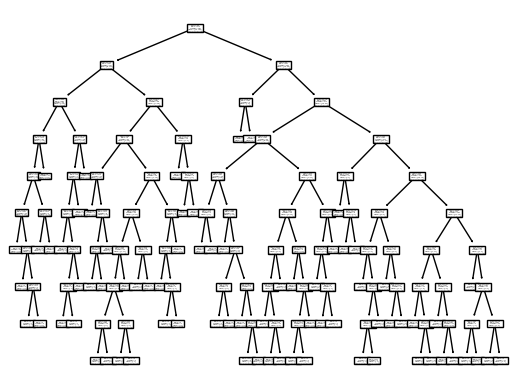

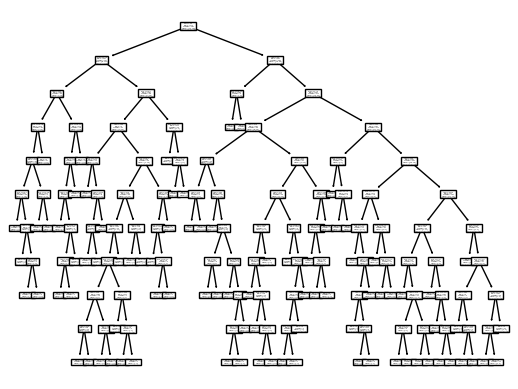

In [24]:
# looking at effect of pruning   
dev_pruned_scores = [] 
train_scores = []
for d in depth:
    
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    clf.fit(x_train, y_train)
    tree.plot_tree(clf, feature_names=features, class_names=['Not survived', 'Survived'])
    plt.show()
    score = clf.score(x_dev, y_dev)
    t_score = clf.score(x_train, y_train)
    dev_pruned_scores.append(score)
    train_scores.append(t_score)

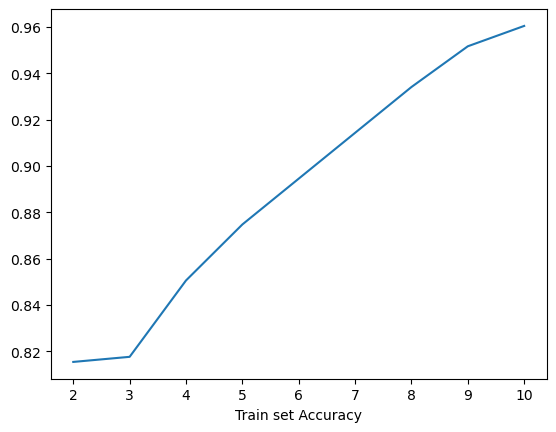

In [25]:
#plotting 
fig, ax = plt.subplots()
ax.plot(depth,train_scores )
plt.xlabel("Max_depth values")
plt.xlabel("Train set Accuracy")
ax.xaxis.set_ticks(depth)
plt.show()

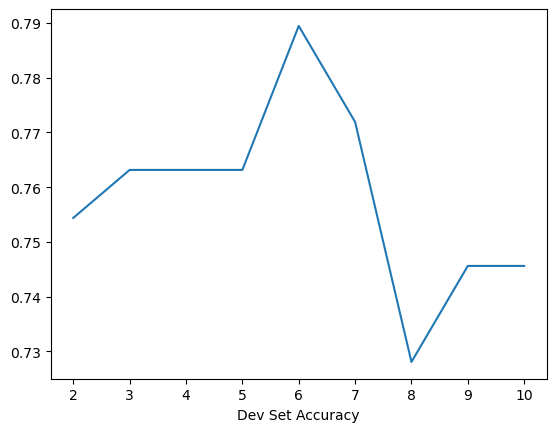

In [26]:
#plotting 
fig, ax = plt.subplots()
ax.plot(depth, dev_pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Dev Set Accuracy")
ax.xaxis.set_ticks(depth)
plt.show()

In [27]:
# fitting the chosen tree
best_depth = depth[np.argmax(dev_pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(x_train, y_train)
pruned.score(x_test, y_test)

Best performance reached at depth of: 6


0.7482517482517482

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier



# Bagged, Random, Boosted Trees

In [30]:
# Bagging Classifier

In [31]:
bc_tree = BaggingClassifier(dtree, n_estimators=100, random_state=7)
bc_tree.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [32]:
bc_tree.score(x_test, y_test)

0.7622377622377622

#Random Forest

In [33]:

rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(x_train, y_train)


RandomForestClassifier(max_depth=5)

In [34]:
rfc.score(x_test, y_test)

0.7832167832167832

In [35]:
#Boosting Classifier

In [36]:
clf = GradientBoostingClassifier(n_estimators=100, max_depth=10)
clf.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=10)

In [37]:
clf.score(x_test, y_test)

0.7132867132867133

# Find Important Features Using Random Forest

In [38]:
feature_imp = pd.Series(rfc.feature_importances_).sort_values(ascending=False)
feature_imp

1    0.387646
2    0.210171
0    0.203334
3    0.198848
dtype: float64

In [39]:
# It seems that Your ticket class(Plcass) determine whether a passenger survives. The higher the ticket class the more likely they w

In [40]:
x.iloc[:, 1:4]


,Sex,Age,Fare
0,1,22.0,7.2500
1,0,38.0,71.2833
2,0,26.0,7.9250
3,0,35.0,53.1000
4,1,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,1,27.0,13.0000
887,0,19.0,30.0000
889,1,26.0,30.0000


# Finding Best Score for Models

In [45]:
b_score =[]
rand = []
boost = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% tes

for n in range (100, 500, 100):
    bagging = BaggingClassifier(dtree, n_estimators=n, random_state=0)
    bagging.fit(x_train, y_train)
    forest = RandomForestClassifier(n_estimators=n, max_depth=best_depth)
    forest.fit(x_train, y_train)
    booster = GradientBoostingClassifier(n_estimators=n, max_depth=best_depth)
    booster.fit(x_train, y_train)
    

    bg_score = bagging.score(x_test, y_test)
    rand_score = forest.score(x_test, y_test)
    bs_score = booster.score(x_test, y_test)
    b_score.append(bg_score)
    boost.append(bs_score)
    rand.append(rand_score)
    

    
    
    

In [47]:
en = range(100, 500, 100)

In [48]:
best_bagg = en[np.argmax(b_score)]

In [49]:
best_rand = en[np.argmax(rand)]

In [50]:
best_boost = en[np.argmax(boost)]

In [51]:
fore = RandomForestClassifier(n_estimators=best_rand, max_depth=best_depth)
fore.fit(x_train, y_train)
fore.score(x_test, y_test)

0.8130841121495327

In [52]:
bagging = BaggingClassifier(dtree, n_estimators=best_bagg, random_state=0)
bagging.fit(x_train, y_train)
bagging.score(x_test, y_test)

0.7616822429906542

In [53]:
booster = GradientBoostingClassifier(n_estimators=best_boost, max_depth=best_depth)
booster.fit(x_train, y_train)
booster.score(x_test, y_test)

0.7336448598130841